In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#1 - Pick a problem that interests you and find a dataset

# Read file
df = pd.read_csv('water_potability.csv')

# Getting Size
df.shape

(3276, 10)

In [3]:
# Look at the head
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#2 - Describe the problem and how ML can help
# I chose this problem because there are many countries around the world with potable water accessibility issues hence
# they can benefit of a model trained with several water quality metrics to easily identify what is potable or not.

In [5]:
#3 - Prepare the data and run EDA

In [6]:
#3.1 - Change name of columns to be lower case
df.columns = df.columns.str.lower()

df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
#3.2 - Identify columns with null
print("Number of NaNs per column:")
print(df.isna().sum())

Number of NaNs per column:
ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64


In [8]:
#3.3 - populate the NANs with the median for the columns as 0 would imply 0 ph, sulfate, trihalomethanes

# Printing the medians
print("Median PH: ", df['ph'].median())
print("Median Sulfate: ", df['sulfate'].median())
print("Median Trihalomethanes: ", df['trihalomethanes'].median())

# Assigning the median values
for col in ['ph', 'sulfate', 'trihalomethanes']:
    df[col] = df[col].fillna(df[col].median())

# Confirm change was applied
print("--------")
print("Number of NaNs per column:")
print(df.isna().sum())

Median PH:  7.036752103833548
Median Sulfate:  333.073545745888
Median Trihalomethanes:  66.62248509808484
--------
Number of NaNs per column:
ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64


In [9]:
# Checking the head again to see if values were applied correctly
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
#3.4 - Shuffle records as they seem to be grouped in chunks of 0s and 1s which could bring problems to the model
# Random State = 42 will be used to guarantee same shuffle 
# Index will be reset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.036752,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
4,6.615350,179.240661,26392.863612,9.309160,333.073546,496.363562,12.786595,78.262369,4.453443,1


In [11]:
#3.5 - Split data
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
# Use train_test_split function for that with random_state=42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print("DataFrame Size: ", df.shape[0])

sizeFullTrainDataframe = len(df_full_train)
sizeTrainDataframe = len(df_train)
sizeValDataframe = len(df_val)
sizeTestDataframe = len(df_test)

print("Size of Full Train Dataframe: ", sizeFullTrainDataframe, " - Size of Train dataframe: ", sizeTrainDataframe, 
      " - Size of Validation Dataframe: ", sizeValDataframe, " - Size of Test dataframe: ", sizeTestDataframe)
print("Is the number of rows of dataframe equals to the sum of the Train, Validation and Test dataframe? ", 
      (df.shape[0] == sizeTrainDataframe + sizeValDataframe + sizeTestDataframe))

DataFrame Size:  3276
Size of Full Train Dataframe:  2620  - Size of Train dataframe:  1965  - Size of Validation Dataframe:  655  - Size of Test dataframe:  656
Is the number of rows of dataframe equals to the sum of the Train, Validation and Test dataframe?  True


In [12]:
# Reset Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Prepare y
y_train = df_train.potability.values
y_val = df_val.potability.values
y_test = df_test.potability.values

# Delete column converted
del df_train['potability']
del df_val['potability']
del df_test['potability'] 

# Defining a variable to hold the model results
model_results = []

In [13]:
#4 - Train several models, tune them, and pick the best

In [14]:
#4.1 - DictVectorize the data
dv = DictVectorizer(sparse=False)
 
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

X_train = dv.fit_transform(train_dict)

In [15]:
#4.2 - Train LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
#4.2.1 - Try again the validation dataframe
# val_dict = df_val.to_dict(orient='records')
# X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
potability_decision = (y_pred >= 0.5)
(y_val == potability_decision).mean()

np.float64(0.6091603053435114)

In [17]:
model_results.append(("Logistic Regression AUC", round(roc_auc_score(y_val, y_pred),3)))
model_results[0]

('Logistic Regression AUC', 0.503)

In [18]:
#4.3 - Train DecisionTree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
# X_val = dv.transform(val_dict)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
#4.3.1 - Try the validation dataframe
y_pred = dt.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred),3)

model_results.append(("Decision Tree AUC", round(roc_auc_score(y_val, y_pred),3)))
model_results[1]

('Decision Tree AUC', 0.571)

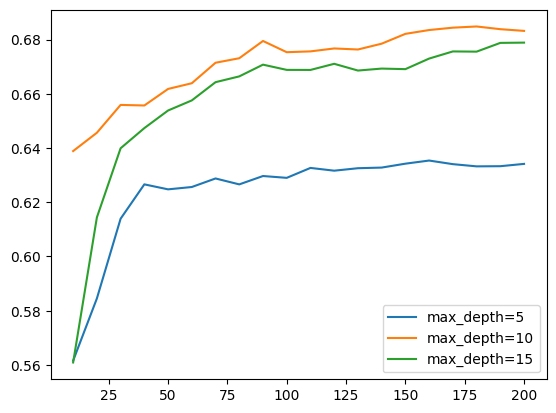

In [20]:
#4.4 - Train RandomForest

#4.4.1 - Find Max Depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [21]:
# 4.4.2 - Set MaxDepth
max_depth=10

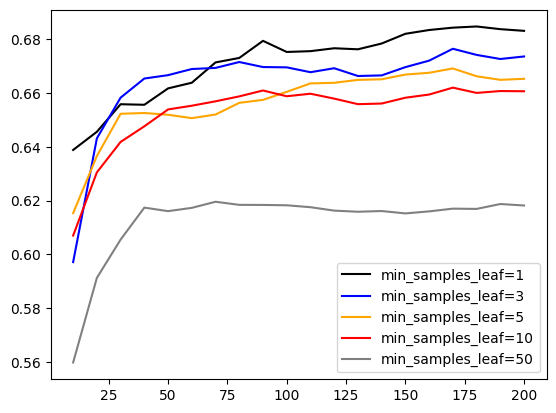

In [22]:
# 4.4.3 - Find min_samples_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

# Creating a dataframe from scores
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

# Plotting
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()


In [23]:
# 4.4.4 - Set min_samples_leaf
min_samples_leaf = 1

In [24]:
# 4.4.5 - Fit
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# 4.4.6 - Try de validation dataframe
y_pred = rf.predict_proba(X_val)[:, 1]

model_results.append(("Random Forest AUC", round(roc_auc_score(y_val, y_pred),3)))
model_results[2]

('Random Forest AUC', 0.687)

In [ ]:
# 4.5 - Pick the best model
model_r